## Problem Statement


- Scaler is an online tech-versity offering intensive computer science & Data Science courses through live classes delivered by tech leaders and subject matter experts. 
- The meticulously structured program enhances the skills of software professionals by offering a modern curriculum with exposure to the latest technologies. It is a product by InterviewBit.


- You are working as a data scientist with the analytics vertical of Scaler, focused on profiling the best companies and job positions to work for from the Scaler database.
- You are provided with the information for a segment of learners and tasked to cluster them on the basis of their job profile, company, and other features. Ideally, these clusters should have similar characteristics.




## Data Dictionary:

- ‘Unnamed 0’- Index of the dataset
- Email_hash- Anonymised Personal Identifiable Information (PII)
- Company_hash- Current employer of the learner
- orgyear- Employment start date
- CTC- Current CTC
- Job_position- Job profile in the company
- CTC_updated_year: Year in which CTC got updated (Yearly increments, Promotions)


#### Concept Used:

- Manual Clustering
- Unsupervised Clustering - K- means, Hierarchical Clustering




In [127]:
import re
import numpy as np
import pandas as pd

import matplotlib.pyplot as plt
plt.rcParams["figure.figsize"] = (12,8)

In [128]:
import warnings
warnings.filterwarnings("ignore")


In [129]:
df = pd.read_csv("scaler_clustering.csv",index_col=0)

In [130]:
df.sample(10)

,company_hash,email_hash,orgyear,ctc,job_position,ctc_updated_year
17621,bvi ogenfvqt,e93abc6cafbd171f08953540ecf510f10dd3c29698fe2d...,2015.0,200000,Frontend Engineer,2021.0
43264,qfo,95359fcf297402a0fd09a5d467e90647494e1820fb4091...,2018.0,600000,NaN,2021.0
6416,zgzt,fb69e1bf6d85b39e4759ad3db8a1a55c1175c240108cca...,2016.0,450000,Devops Engineer,2020.0
35431,fyttrotjt ntwyzgrgsj,21f6b7f3bd41a215b0fff15baf9a2253a8eba2fd0127b7...,2018.0,200000,NaN,2021.0
109059,xzegojo,630b0d4ce7833b3a0f4985f36ea19b76c483523be204b6...,2020.0,525000,FullStack Engineer,2021.0
2417,qxv vacxogqj,adf6018a5bdfcd819beb86808e9c3ed2ea954a543f7dbf...,2020.0,700000,NaN,2021.0
175594,sggsrt,8e4b39577f3b328db8ef87cbc841a9fa18be0983157416...,2018.0,1950000,Frontend Engineer,2020.0
47541,hztburgjta,b4a2b543479e569cbb4591e4490f7685b0856540c08094...,2018.0,24000,NaN,2020.0
84285,ovu,08a1ffc2306b7b84edb7081c030c34df39858269cdcd2a...,2015.0,930000,Frontend Engineer,2018.0
134205,gzbgmxrt srgmvr rxbxnta,491c9b3c8df401e916538f4d9d39c8a3fee1a39d7db834...,2012.0,1700000,FullStack Engineer,2018.0


In [131]:
df.shape

(205843, 6)

In [132]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 205843 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column            Non-Null Count   Dtype  
---  ------            --------------   -----  
 0   company_hash      205799 non-null  object 
 1   email_hash        205843 non-null  object 
 2   orgyear           205757 non-null  float64
 3   ctc               205843 non-null  int64  
 4   job_position      153281 non-null  object 
 5   ctc_updated_year  205843 non-null  float64
dtypes: float64(2), int64(1), object(3)
memory usage: 11.0+ MB


In [133]:
df.isna().sum()

company_hash           44
email_hash              0
orgyear                86
ctc                     0
job_position        52562
ctc_updated_year        0
dtype: int64

In [134]:
(df.isna().sum()/ len(df))*100

company_hash         0.021376
email_hash           0.000000
orgyear              0.041779
ctc                  0.000000
job_position        25.534995
ctc_updated_year     0.000000
dtype: float64

In [135]:
df.describe()

,orgyear,ctc,ctc_updated_year
count,205757.000000,2.058430e+05,205843.000000
mean,2014.882750,2.271685e+06,2019.628231
std,63.571115,1.180091e+07,1.325104
min,0.000000,2.000000e+00,2015.000000
25%,2013.000000,5.300000e+05,2019.000000
50%,2016.000000,9.500000e+05,2020.000000
75%,2018.000000,1.700000e+06,2021.000000
max,20165.000000,1.000150e+09,2021.000000


In [136]:
# based on above information , noticing some unusual outliers in the data  

In [137]:
df.describe(include="object")

,company_hash,email_hash,job_position
count,205799,205843,153281
unique,37299,153443,1017
top,nvnv wgzohrnvzwj otqcxwto,bbace3cc586400bbc65765bc6a16b77d8913836cfc98b7...,Backend Engineer
freq,8337,10,43554


In [138]:
def preprocess_string(string):
    new_string= re.sub('[^A-Za-z ]+', '', string).lower().strip()
    return new_string
    
mystring='\tAirtel\\\\&&**() X Labs'
preprocess_string(mystring)

'airtel x labs'

In [139]:
df["company_hash"].nunique()

37299

In [140]:
df["company_hash"] = df["company_hash"].apply(lambda x: preprocess_string(str(x))) 
df["company_hash"].nunique()

37208

In [141]:
df["job_position"].nunique()
# 1017 unique job positions are there in the dataset 

1017

In [142]:
df["job_position"] = df["job_position"].apply(lambda x: preprocess_string(str(x))) 
df["job_position"].nunique()

# 857 unique job positions are there in the dataset after preprocessing strings 

857

In [143]:
# removing the email_hash
df.drop("email_hash",axis = 1,inplace=True)

In [144]:
df.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
135202,nxmwg ogenfvqt xzw,2014.0,270000,backend engineer,2016.0
8043,st,2012.0,1320000,backend engineer,2019.0
191058,vbvkgz rvm,2010.0,220000,fullstack engineer,2019.0
190577,vagmt,2016.0,2200000,devops engineer,2019.0
64059,obvqnqgz,2014.0,650000,android engineer,2019.0


In [145]:
df.duplicated().sum() # 17597 duplicated records

17597

In [146]:
df.isna().sum()

company_hash         0
orgyear             86
ctc                  0
job_position         0
ctc_updated_year     0
dtype: int64

In [147]:
(df["company_hash"] == "").sum()

89

In [148]:
(df["company_hash"] == "nan").sum()

44

In [149]:
(df["job_position"] == "").sum()

9

In [150]:
(df["job_position"] == "nan").sum()

52562

In [151]:
# removing the records where company or job_position reocords are not available 

In [152]:
df[(df["company_hash"] == "") | (df["job_position"] == "")].sample(10)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
167717,,2018.0,1500000,backend engineer,2020.0
76907,,2021.0,800000,nan,2021.0
25333,,2019.0,2000000,nan,2021.0
202179,,2016.0,500000,nan,2017.0
84192,,2018.0,1400000,backend engineer,2019.0
197978,,2020.0,1000000,nan,2019.0
50414,,2020.0,720000,nan,2019.0
117571,,2010.0,4500000,nan,2019.0
127679,,2019.0,1400000,backend engineer,2019.0
80668,,2019.0,850000,nan,2019.0


In [153]:
len(df[(df["company_hash"] == "") | (df["job_position"] == "")])

98

In [154]:
# df[((df["company_hash"] != "") & (df["job_position"] != ""))]

In [155]:
df = df[~((df["company_hash"] == "") | (df["job_position"] == ""))]
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
206918,vuurt xzw,2008.0,220000,nan,2019.0
206919,husqvawgb,2017.0,500000,nan,2020.0
206920,vwwgrxnt,2021.0,700000,nan,2021.0
206921,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


In [156]:
df["orgyear"].isna().sum()

86

In [157]:
df.groupby("company_hash")["orgyear"].transform("median")

0         2014.0
1         2016.0
2         2015.0
3         2016.0
4         2017.0
           ...  
206918    2018.0
206919    2017.0
206920    2016.0
206921    2020.0
206922    2015.0
Name: orgyear, Length: 205745, dtype: float64

In [158]:
df["orgyear"].fillna(df['orgyear'].isnull().sum(),inplace=True)

In [159]:
df["orgyear"].isna().sum()

0

In [160]:
df.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year
175831,bxqtrk,2013.0,2500000,fullstack engineer,2019.0
49006,wxnx,2018.0,1500000,backend engineer,2021.0
21098,tdr,2015.0,730000,other,2020.0
151312,nvnv wgzohrnvzwj otqcxwto,2020.0,700000,fullstack engineer,2020.0
153058,vwwtznhqt,2016.0,700000,nan,2021.0


# outliers : 

In [161]:
df["orgyear"].value_counts()

2018.0    25240
2019.0    23402
2017.0    23237
2016.0    23038
2015.0    20602
          ...  
2107.0        1
1972.0        1
2101.0        1
208.0         1
200.0         1
Name: orgyear, Length: 78, dtype: int64

<IPython.core.display.Javascript object>

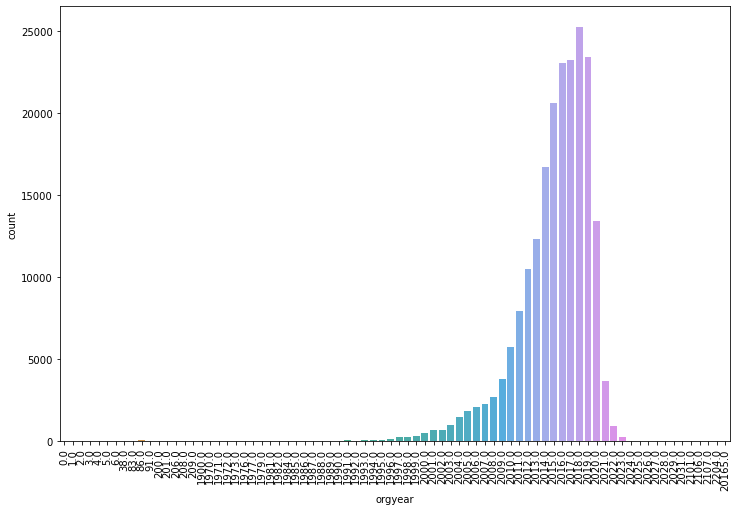

In [162]:
sns.countplot(df["orgyear"])
plt.xticks(rotation = 90)
plt.show()

In [163]:
# sns.histplot(np.log(df["orgyear"]))

In [164]:
df["orgyear"].quantile(0.001)

1990.0

In [165]:
df["orgyear"].quantile(0.999)

2023.0

In [166]:
df["orgyear"] = df["orgyear"].clip(1990,2022)

<IPython.core.display.Javascript object>

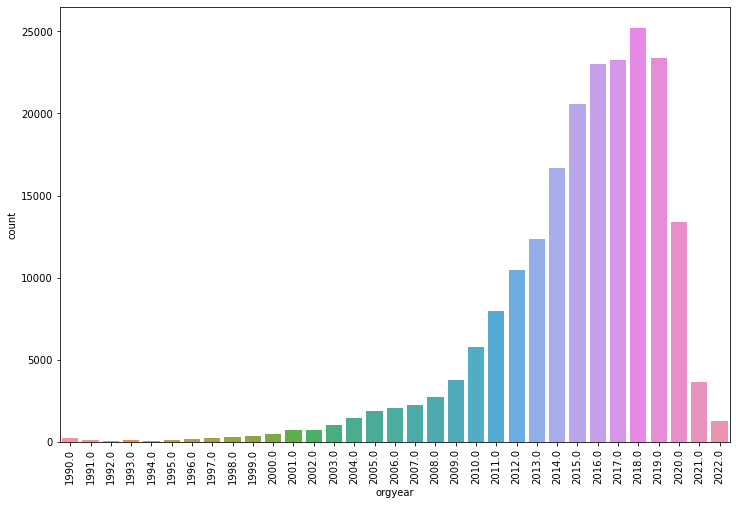

In [167]:
sns.countplot(df["orgyear"])
plt.xticks(rotation = 90)
plt.show()

In [168]:
df["ctc_updated_year"].quantile(0.001)

2015.0

In [169]:
df["ctc_updated_year"].quantile(0.99)

2021.0

<IPython.core.display.Javascript object>

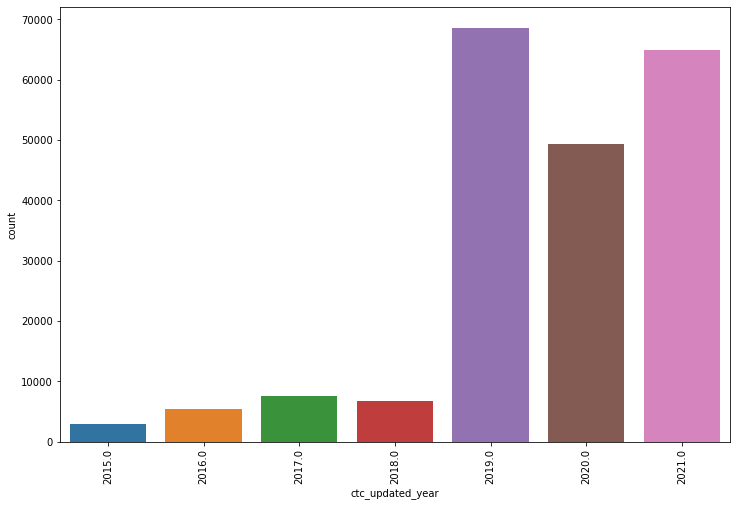

In [170]:
sns.countplot(df["ctc_updated_year"])
plt.xticks(rotation = 90)
plt.show()

In [171]:
df["ctc"].quantile(0.01)

37000.0

In [172]:
df["ctc"].quantile(0.999)

200000000.0

In [173]:
df = df.loc[((df.ctc) > df.ctc.quantile(0.01)) & ((df.ctc) < df.ctc.quantile(0.99))]

In [174]:
df

,company_hash,orgyear,ctc,job_position,ctc_updated_year
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0
2,ojzwnvwnxw vx,2015.0,2000000,backend engineer,2020.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0
...,...,...,...,...,...
206918,vuurt xzw,2008.0,220000,nan,2019.0
206919,husqvawgb,2017.0,500000,nan,2020.0
206920,vwwgrxnt,2021.0,700000,nan,2021.0
206921,zgn vuurxwvmrt,2019.0,5100000,nan,2019.0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ctc', ylabel='Density'>

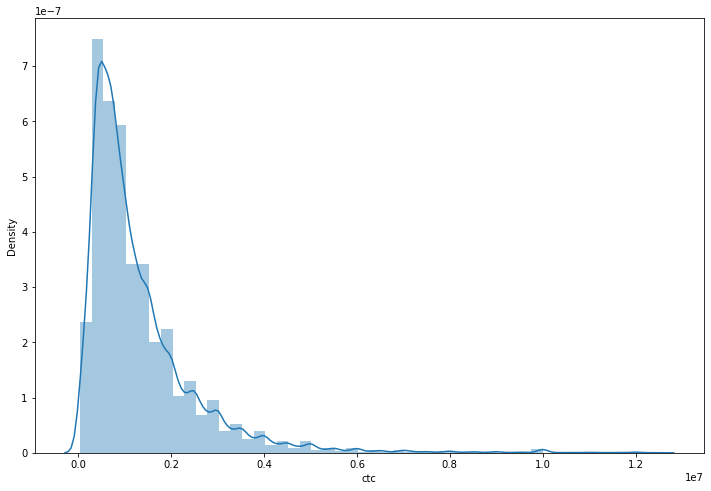

In [175]:
sns.distplot(df["ctc"])

In [176]:
df.loc[df['job_position']=='nan', 'job_position']=np.nan

In [177]:
df.loc[df["company_hash"]=="nan","company_hash"] = np.nan

In [178]:
df.company_hash.value_counts(dropna=False)

nvnv wgzohrnvzwj otqcxwto    8215
xzegojo                      5319
vbvkgz                       3409
zgn vuurxwvmrt vwwghzn       3332
wgszxkvzn                    3189
                             ... 
wrgha xzegntwy                  1
eghznvxz ucn rxbxnta            1
lgjj                            1
obw xzegntwy                    1
bvptbjnqxu td vbvkgz            1
Name: company_hash, Length: 36094, dtype: int64

In [179]:
df.job_position.value_counts(dropna=False)

NaN                   51691
backend engineer      42753
fullstack engineer    25422
other                 17350
frontend engineer     10253
                      ...  
lead engineer ii          1
sales manager             1
associate l               1
traineeintern             1
azure data factory        1
Name: job_position, Length: 834, dtype: int64

## masked company name to "Others" having count less than 5 

In [180]:
df.loc[df.groupby("company_hash")["ctc"].transform("count") < 5,"company_hash"] = "Others"

In [181]:
(df["company_hash"] == "Others").sum()

46434

In [182]:
df.company_hash.value_counts(dropna=False)

Others                           46434
nvnv wgzohrnvzwj otqcxwto         8215
xzegojo                           5319
vbvkgz                            3409
zgn vuurxwvmrt vwwghzn            3332
                                 ...  
sgaxsxn stztqvr xzohqvzwt            5
gmotoogqj                            5
lvrvz ntwyzgrgsxto wgzohrnxzs        5
bxwqgonqvntsj                        5
fxuqg                                5
Name: company_hash, Length: 3730, dtype: int64

In [183]:
df['orgyear'].describe()

count    201625.000000
mean       2015.104769
std           4.256063
min        1990.000000
25%        2013.000000
50%        2016.000000
75%        2018.000000
max        2022.000000
Name: orgyear, dtype: float64

In [184]:
# years of experience 
df["years_of_experience_in_organization"] = 2023 - df["orgyear"] 


In [185]:
df.sample(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
157723,Others,2019.0,480999,NaN,2018.0,4.0
85654,xzegojo,2018.0,900000,other,2020.0,5.0


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='years_of_experience_in_organization', ylabel='count'>

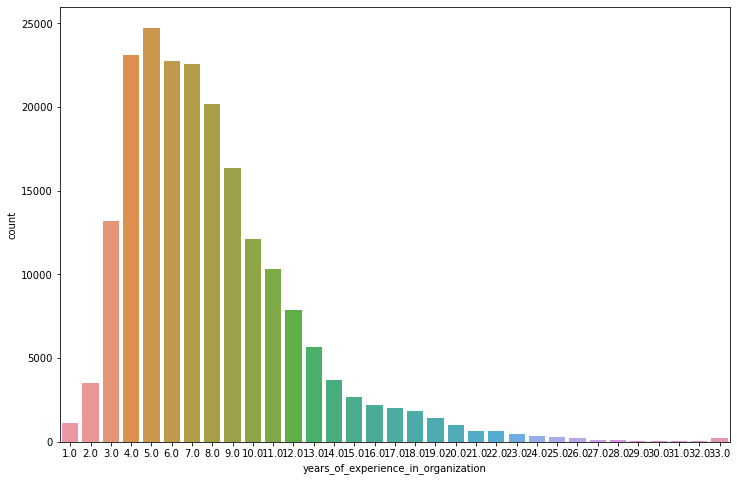

In [186]:
sns.countplot(df["years_of_experience_in_organization"])

In [187]:
df.duplicated().sum()


37683

In [188]:
df.drop_duplicates(inplace=True)
df.shape

(163942, 6)

In [189]:
df.isna().sum()


company_hash                              42
orgyear                                    0
ctc                                        0
job_position                           36745
ctc_updated_year                           0
years_of_experience_in_organization        0
dtype: int64

In [190]:
# records having ctc_updated_year higher than their organization joining year
(df["ctc_updated_year"] < df["orgyear"]).sum()

7181

In [191]:
df.ctc_updated_year = df[["ctc_updated_year","orgyear"]].max(axis = 1)

In [192]:
(df["ctc_updated_year"] < df["orgyear"]).sum()

0

In [193]:
df.sample(2)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization
198803,bgqsvz onvzrtj,2017.0,1600000,NaN,2019.0,6.0
178348,bjznqvlvmgzs,2017.0,1970000,NaN,2017.0,6.0


In [194]:
#Filling null values with others  -- if not done before
df['job_position'] = df['job_position'].fillna('Others')
df['company_hash'] = df['company_hash'].fillna('Others')

In [195]:
df.isna().sum()


company_hash                           0
orgyear                                0
ctc                                    0
job_position                           0
ctc_updated_year                       0
years_of_experience_in_organization    0
dtype: int64

In [196]:
df.duplicated().sum()


1061

In [197]:
# df.drop_duplicates(inplace=True)


In [198]:
df.describe()

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization
count,163942.000000,1.639420e+05,163942.000000,163942.000000
mean,2014.772218,1.425498e+06,2019.595540,8.227782
std,4.402053,1.303985e+06,1.334962,4.402053
min,1990.000000,3.800000e+04,2015.000000,1.000000
25%,2013.000000,6.000000e+05,2019.000000,5.000000
50%,2016.000000,1.039999e+06,2020.000000,7.000000
75%,2018.000000,1.800000e+06,2021.000000,10.000000
max,2022.000000,1.250000e+07,2022.000000,33.000000


In [199]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 163942 entries, 0 to 206922
Data columns (total 6 columns):
 #   Column                               Non-Null Count   Dtype  
---  ------                               --------------   -----  
 0   company_hash                         163942 non-null  object 
 1   orgyear                              163942 non-null  float64
 2   ctc                                  163942 non-null  int64  
 3   job_position                         163942 non-null  object 
 4   ctc_updated_year                     163942 non-null  float64
 5   years_of_experience_in_organization  163942 non-null  float64
dtypes: float64(3), int64(1), object(2)
memory usage: 8.8+ MB


<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='ctc', ylabel='years_of_experience_in_organization'>

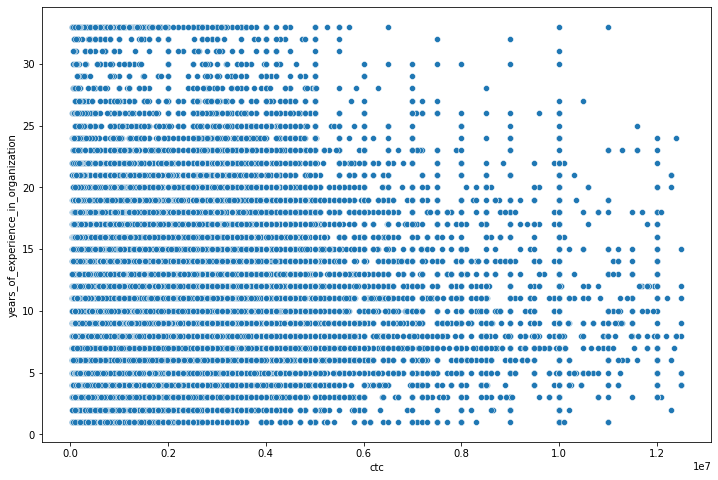

In [200]:
sns.scatterplot(df.ctc,df.years_of_experience_in_organization)

In [201]:
df.columns


Index(['company_hash', 'orgyear', 'ctc', 'job_position', 'ctc_updated_year',
       'years_of_experience_in_organization'],
      dtype='object')

## Manual Clustering based on Company , Job position and Years of experience

In [202]:
GROUPED_CTC = df.groupby(["years_of_experience_in_organization",
                                                         "job_position",
                                                         "company_hash"])["ctc"].describe() 

In [203]:
GROUPED_CTC

count  \
years_of_experience_in_organization job_position       company_hash                               
1.0                                 Others             Others                              58.0   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz        1.0   
                                                       atrgxnnt                             1.0   
                                                       atrr                                 1.0   
                                                       atrr ntwyzgrgsxto                    2.0   
...                                                                                         ...   
33.0                                qa engineer        hzxntaytvrny sqghu                   1.0   
                                                       tmxd ogenfvqt xzaxv ucn rna          1.0   
                                                       utrvnqg ogrhnxgzo ucnrna             1.0   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx    1.0   
                                    support engineer   Others                               2.0   

                                                                                                  mean  \
years_of_experience_in_organization job_position       company_hash                                      
1.0                                 Others             Others                             1.586207e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz      1.600000e+06   
                                                       atrgxnnt                           1.000000e+06   
                                                       atrr                               1.000000e+06   
                                                       atrr ntwyzgrgsxto                  1.000000e+06   
...                                                                                                ...   
33.0                                qa engineer        hzxntaytvrny sqghu                 5.400000e+05   
                                                       tmxd ogenfvqt xzaxv ucn rna        1.220000e+06   
                                                       utrvnqg ogrhnxgzo ucnrna           6.000000e+05   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx  1.400000e+06   
                                    support engineer   Others                             3.700000e+05   

                                                                                                   std  \
years_of_experience_in_organization job_position       company_hash                                      
1.0                                 Others             Others                             2.080212e+06   
                                                       agzn fgqp xz vzj gqsvzxkvnxgz               NaN   
                                                       atrgxnnt                                    NaN   
                                                       atrr                                        NaN   
                                                       atrr ntwyzgrgsxto                  2.828427e+05   
...                                                                                                ...   
33.0                                qa engineer        hzxntaytvrny sqghu                          NaN   
                                                       tmxd ogenfvqt xzaxv ucn rna                 NaN   
                                                       utrvnqg ogrhnxgzo ucnrna                    NaN   
                                    research engineers ovbohzs qa xzonxnhnt xzaxv  atryx           NaN   
                                    support engineer   Others                             3.252691e+05   

                                            

In [204]:
df_GROUPED_CTC_BY_E_P_C = df.merge(GROUPED_CTC,
        on = ["years_of_experience_in_organization",
              "job_position",
              "company_hash"],
        how = "left")

In [205]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0


In [206]:
def classification(x,ctc_50,ctc_75):
    if x < ctc_50:
        return 3
    elif x >= ctc_50 and x <= ctc_75:
        return 2
    elif  x >= ctc_75:
        return 1

In [207]:
df_GROUPED_CTC_BY_E_P_C["designation_in_organization"] = df_GROUPED_CTC_BY_E_P_C.apply(lambda x:classification(x["ctc"],x["50%"],x["75%"]),axis = 1)

In [208]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0,1


In [209]:
df_GROUPED_CTC_BY_E_P_C.designation_in_organization.value_counts(normalize=True)

2    0.456393
3    0.331660
1    0.211947
Name: designation_in_organization, dtype: float64

In [210]:
# df_GROUPED_CTC_BY_EXPERIENCE_POSITION_COMPANY[df_GROUPED_CTC_BY_EXPERIENCE_POSITION_COMPANY['designation_in_organization']==2][['job_position','ctc']].groupby('job_position')['ctc'].describe().sort_values(by=['count','mean'],ascending=False)

In [211]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,1.0,1.100000e+06,NaN,1100000.0,1100000.0,1100000.0,1100000.0,1100000.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,7.0,7.742856e+05,2.509223e+05,449999.0,610000.0,750000.0,900000.0,1200000.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,440.0,1.269393e+06,1.405136e+06,41000.0,400000.0,900000.0,1600000.0,10000000.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,7.0,1.158571e+06,4.047810e+05,700000.0,825000.0,1200000.0,1405000.0,1750000.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,1.0,1.400000e+06,NaN,1400000.0,1400000.0,1400000.0,1400000.0,1400000.0,2
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,1.0,2.200000e+05,NaN,220000.0,220000.0,220000.0,220000.0,220000.0,2
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3.0,1.150000e+06,5.634714e+05,500000.0,975000.0,1450000.0,1475000.0,1500000.0,3
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,3.0,6.666667e+05,3.511885e+05,300000.0,500000.0,700000.0,850000.0,1000000.0,2
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,118.0,1.412015e+06,1.715935e+06,45000.0,400000.0,735000.0,1725250.0,10000000.0,1


In [212]:
df_GROUPED_CTC_BY_E_P_C.drop(columns=['count',
                                     'mean',
                                    'std',
                                    'min',
                                    '25%',
                                    '50%',
                                    '75%',
                                    'max'],axis = 1,inplace=True)


In [213]:
df_GROUPED_CTC_BY_E_P_C

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,2
...,...,...,...,...,...,...,...
163937,vuurt xzw,2008.0,220000,Others,2019.0,15.0,2
163938,husqvawgb,2017.0,500000,Others,2020.0,6.0,3
163939,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,2
163940,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,1


In [214]:
df_GROUPED_CTC_BY_E_P_C.shape

(163942, 7)

## Manual Clustering on company and job position 

In [215]:
GROUPED_C_J=df.groupby(['job_position','company_hash'])['ctc'].describe()
GROUPED_C_J

count  \
job_position          company_hash                                       
Others                Others                                    3520.0   
                      a ntwyzgrgsxto                               6.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna     1.0   
                      abwavnv ojontb                               1.0   
                      adw ntwyzgrgsj                              69.0   
...                                                                ...   
wordpress developer   Others                                       1.0   
worker                zgn vuurxwvmrt vwwghzn                       1.0   
x                     Others                                       1.0   
young professional ii sgctqzbtzn ge xzaxv                          1.0   
zomato                kgbvng                                       2.0   

                                                                        mean  \
job_position          company_hash                                             
Others                Others                                    1.366188e+06   
                      a ntwyzgrgsxto                            1.229167e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  5.000000e+05   
                      abwavnv ojontb                            7.000000e+05   
                      adw ntwyzgrgsj                            8.502319e+05   
...                                                                      ...   
wordpress developer   Others                                    6.000000e+05   
worker                zgn vuurxwvmrt vwwghzn                    2.000000e+05   
x                     Others                                    4.000000e+05   
young professional ii sgctqzbtzn ge xzaxv                       5.000000e+05   
zomato                kgbvng                                    3.000000e+05   

                                                                         std  \
job_position          company_hash                                             
Others                Others                                    1.445330e+06   
                      a ntwyzgrgsxto                            1.401465e+06   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna           NaN   
                      abwavnv ojontb                                     NaN   
                      adw ntwyzgrgsj                            1.036041e+06   
...                                                                      ...   
wordpress developer   Others                                             NaN   
worker                zgn vuurxwvmrt vwwghzn                             NaN   
x                     Others                                             NaN   
young professional ii sgctqzbtzn ge xzaxv                                NaN   
zomato                kgbvng                                    2.828427e+05   

                                                                     min  \
job_position          company_hash                                         
Others                Others                                     40000.0   
                      a ntwyzgrgsxto                            350000.0   
                      aaqxctz avnv owxtzwto  vzvrjnxwo ucn rna  500000.0   
                      abwavnv ojontb                            700000.0   
                      adw ntwyzgrgsj                             80000.0   
...                                                                  ...   
wordpress developer   Others                                    600000.0   
worker                zgn vuurxwvmrt vwwghzn                    200000.0   
x                     Others                                    400000.0   
young professional ii sgctqzbtzn ge xzaxv                       500000.0   
zomato                kgbvng                                    100000.0   

                               

In [216]:
df_GROUPED_C_J=df.merge(GROUPED_C_J, on=['job_position','company_hash'], how='left')


In [217]:
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
126677,zvz,2019.0,3200000,data scientist,2019.0,4.0,39.0,1.211500e+06,7.584555e+05,46500.0,647500.0,1000000.0,1650000.0,3200000.0
93215,nvnv wgzohrnvzwj otqcxwto,2012.0,850000,ios engineer,2019.0,11.0,19.0,6.852632e+05,3.520475e+05,70000.0,425000.0,600000.0,850000.0,1550000.0
29447,wvustbxzx,2013.0,910000,backend engineer,2021.0,10.0,247.0,8.295992e+05,4.891276e+05,40000.0,475000.0,700000.0,1070000.0,3000000.0
41080,znn avnv otqcxwto,2019.0,700000,Others,2019.0,4.0,62.0,1.142984e+06,1.738646e+06,300000.0,400000.0,690000.0,1275000.0,10000000.0
76917,Others,2013.0,1100000,other,2021.0,10.0,2367.0,1.117373e+06,1.423744e+06,38000.0,350000.0,700000.0,1326000.0,12000000.0


In [218]:
# creating classes basis on the salary in their respective company

In [219]:
df_GROUPED_C_J['classs'] = df_GROUPED_C_J.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)


In [220]:
df_GROUPED_C_J.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max,classs
79071,ohnytqrvza,2017.0,710000,data scientist,2019.0,6.0,2.0,6.155000e+06,7.700393e+06,710000.0,3432500.0,6155000.0,8877500.0,11600000.0,3
122059,Others,2019.0,130000,fullstack engineer,2020.0,4.0,3181.0,1.193104e+06,1.532888e+06,40000.0,350000.0,775000.0,1450000.0,12000000.0,3
35726,wvwnho wgbbhzxwvnxgzo,2013.0,400000,Others,2020.0,10.0,3.0,7.333333e+05,5.773503e+05,400000.0,400000.0,400000.0,900000.0,1400000.0,2
68461,vau,2015.0,819999,backend engineer,2019.0,8.0,51.0,1.124500e+06,9.053526e+05,105000.0,690000.0,820000.0,1325000.0,6000000.0,3
42240,wgszxkvzn,2015.0,800000,frontend engineer,2021.0,8.0,105.0,7.959143e+05,5.380693e+05,65000.0,450000.0,600000.0,1000000.0,4298000.0,2


In [221]:
df_GROUPED_C_J.classs.value_counts(normalize=True)

3    0.435373
2    0.320101
1    0.244526
Name: classs, dtype: float64

In [222]:
df_GROUPED_C_J.drop(columns=['count',
                                     'mean',
                                    'std',
                                    'min',
                                    '25%',
                                    '50%',
                                    '75%',
                                    'max'],axis = 1,inplace=True)


In [223]:
df_GROUPED_CTC_BY_E_P_C.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
designation_in_organization                         2
Name: 0, dtype: object

In [224]:
df_GROUPED_C_J.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
classs                                              1
Name: 0, dtype: object

In [225]:
df_Grouped = df_GROUPED_CTC_BY_E_P_C.merge(df_GROUPED_C_J, on=['company_hash',
                                                      'orgyear',
                                                      'ctc',
                                                      'job_position',
                                                      'years_of_experience_in_organization',
                                                      'ctc_updated_year'], how='left')


In [226]:
df_Grouped.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs
107145,cgjrrv evoyxgzo ucn rna,2018.0,900000,fullstack engineer,2018.0,5.0,2,3
100926,ztw ntwyzgrgsxto xzaxv rna,2019.0,540000,Others,2021.0,4.0,2,3
62274,eoo,2019.0,500000,backend engineer,2021.0,4.0,2,2
10909,vqwtoxhb,2019.0,1500000,Others,2020.0,4.0,3,3
60338,bxzanqtt,2017.0,488000,support engineer,2020.0,6.0,2,3


In [227]:
df_Grouped.shape

(166228, 8)

## Manual Clustering based on comapny

In [228]:
GROUPED_C = df.groupby(['company_hash'])['ctc'].describe()
df_company = df.merge(GROUPED_C, on=['company_hash'], how='left')


In [229]:
df_company.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,count,mean,std,min,25%,50%,75%,max
46717,Others,2012.0,700000,ios engineer,2019.0,11.0,26256.0,1.311366e+06,1.436286e+06,38000.0,440000.0,900000.0,1650000.0,12500000.0
93680,vwwgrxnt,2013.0,1900000,backend engineer,2018.0,10.0,165.0,1.414836e+06,6.917496e+05,200000.0,1000000.0,1300000.0,1500000.0,4800000.0
136812,x vb v onhatzn,2018.0,600000,other,2018.0,5.0,49.0,1.206531e+06,1.115764e+06,100000.0,500000.0,900000.0,1700000.0,6500000.0
111948,nguuq,2018.0,1600000,Others,2019.0,5.0,72.0,1.707083e+06,1.085002e+06,350000.0,900000.0,1560000.0,2070000.0,5000000.0
9856,Others,2016.0,1440000,frontend engineer,2019.0,7.0,26256.0,1.311366e+06,1.436286e+06,38000.0,440000.0,900000.0,1650000.0,12500000.0


In [230]:
df_company['tier'] =df_company.apply(lambda x: classification(x['ctc'],x['50%'],x['75%']),axis=1)


In [231]:
# df_company.sample(5)

In [232]:
df_company.tier.value_counts(normalize=True)

3    0.477364
2    0.282911
1    0.239725
Name: tier, dtype: float64

In [233]:
df_company.drop(['count','mean','std','min','25%','50%','75%','max'],
               axis = 1,
               inplace=True)

In [234]:
df_company.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
tier                                                2
Name: 0, dtype: object

In [235]:
df_Grouped.iloc[0]

company_hash                           atrgxnnt xzaxv
orgyear                                        2016.0
ctc                                           1100000
job_position                                    other
ctc_updated_year                               2020.0
years_of_experience_in_organization               7.0
designation_in_organization                         2
classs                                              1
Name: 0, dtype: object

In [236]:
df_Grouped = df_Grouped.merge(df_company,
                 on=['company_hash',
                     'orgyear','ctc',
                     'job_position',
                     'years_of_experience_in_organization',
                     'ctc_updated_year'
                    ])

In [237]:
df_Grouped

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,atrgxnnt xzaxv,2016.0,1100000,other,2020.0,7.0,2,1,2
1,qtrxvzwt xzegwgbb rxbxnta,2018.0,449999,fullstack engineer,2019.0,5.0,3,3,3
2,Others,2015.0,2000000,backend engineer,2020.0,8.0,1,1,1
3,ngpgutaxv,2017.0,700000,backend engineer,2019.0,6.0,3,3,3
4,qxen sqghu,2017.0,1400000,fullstack engineer,2019.0,6.0,2,1,1
...,...,...,...,...,...,...,...,...,...
171311,vuurt xzw,2008.0,220000,Others,2019.0,15.0,2,3,3
171312,husqvawgb,2017.0,500000,Others,2020.0,6.0,3,3,3
171313,vwwgrxnt,2021.0,700000,Others,2021.0,2.0,2,3,3
171314,zgn vuurxwvmrt,2019.0,5100000,Others,2019.0,4.0,1,1,1


In [238]:
X = df_Grouped.copy()

In [239]:
X.shape

(171316, 9)

In [240]:
X_data = X.drop(["company_hash","job_position"],axis  = 1)

In [241]:
X_data

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,2016.0,1100000,2020.0,7.0,2,1,2
1,2018.0,449999,2019.0,5.0,3,3,3
2,2015.0,2000000,2020.0,8.0,1,1,1
3,2017.0,700000,2019.0,6.0,3,3,3
4,2017.0,1400000,2019.0,6.0,2,1,1
...,...,...,...,...,...,...,...
171311,2008.0,220000,2019.0,15.0,2,3,3
171312,2017.0,500000,2020.0,6.0,3,3,3
171313,2021.0,700000,2021.0,2.0,2,3,3
171314,2019.0,5100000,2019.0,4.0,1,1,1


In [242]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_data)
X_sc = pd.DataFrame(scaler.transform(X_data), columns=X_data.columns, index=X_data.index)

In [243]:
X_sc

,orgyear,ctc,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier
0,0.229439,-0.238430,0.298195,-0.229439,-0.175910,-1.497105,-0.300556
1,0.680950,-0.741765,-0.452799,-0.680950,1.196414,1.001707,0.933655
2,0.003683,0.458493,0.298195,-0.003683,-1.548235,-1.497105,-1.534766
3,0.455194,-0.548174,-0.452799,-0.455194,1.196414,1.001707,0.933655
4,0.455194,-0.006122,-0.452799,-0.455194,-0.175910,-1.497105,-1.534766
...,...,...,...,...,...,...,...
171311,-1.576605,-0.919866,-0.452799,1.576605,-0.175910,1.001707,0.933655
171312,0.455194,-0.703046,0.298195,-0.455194,1.196414,1.001707,0.933655
171313,1.358216,-0.548174,1.049190,-1.358216,-0.175910,1.001707,0.933655
171314,0.906705,2.859008,-0.452799,-0.906705,-1.548235,-1.497105,-1.534766


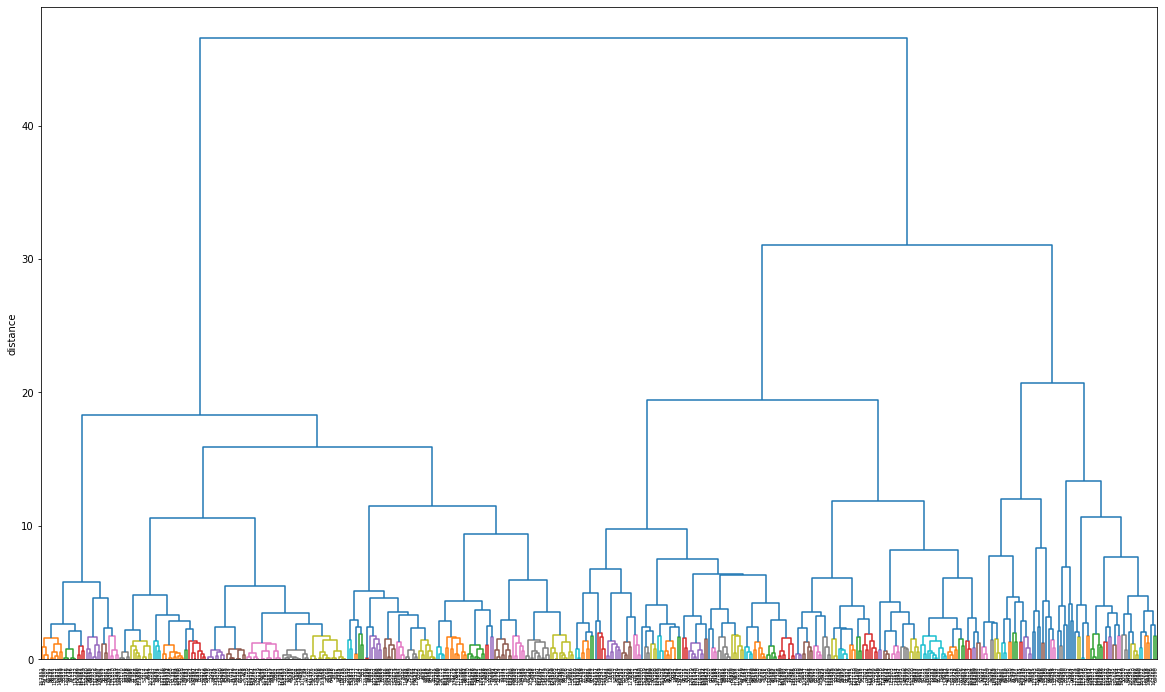

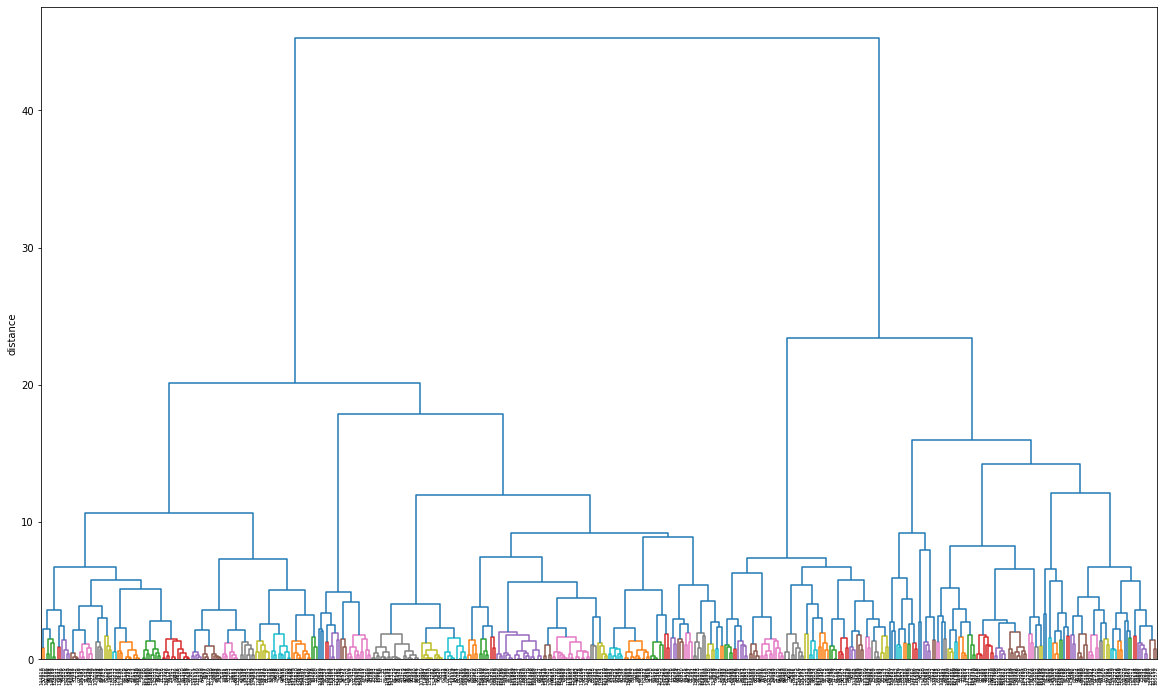

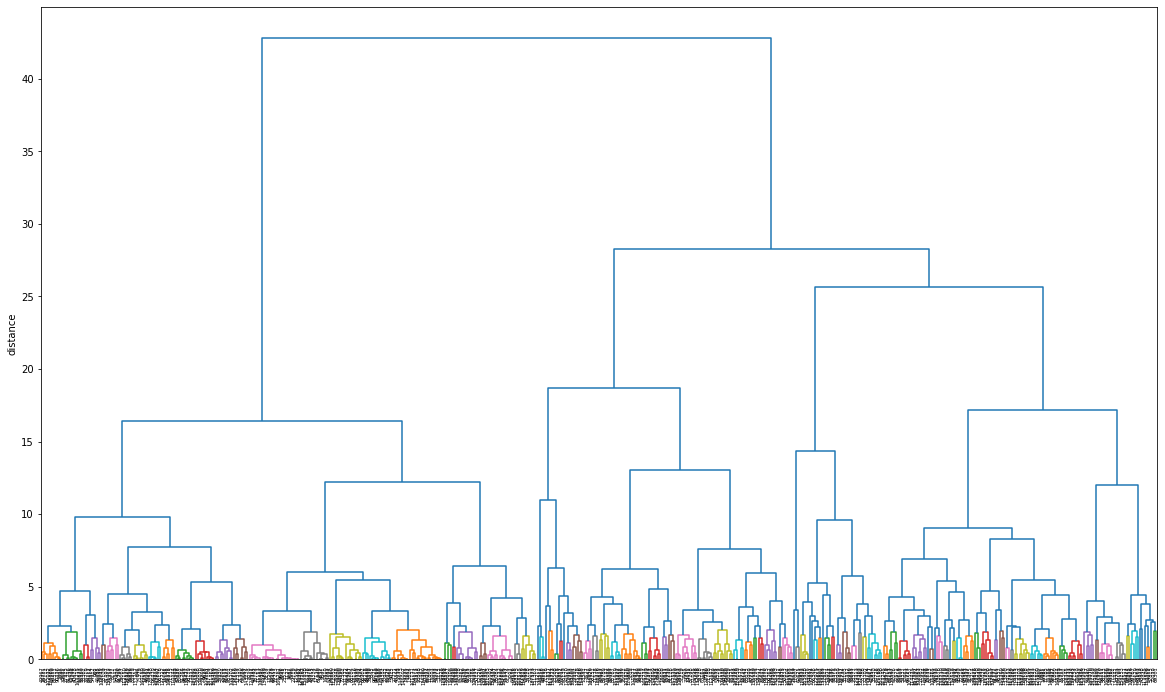

In [244]:
import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax1 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax1, color_threshold=2)
plt.xticks(rotation=90)
ax1.set_ylabel('distance')
plt.show()

import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax2 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax2, color_threshold=2)
plt.xticks(rotation=90)
ax2.set_ylabel('distance')
plt.show()



import scipy.cluster.hierarchy as sch
import matplotlib.pyplot as plt

sample = X_sc.sample(500)
Z = sch.linkage(sample, method='ward')

fig, ax3 = plt.subplots(figsize=(20, 12))
sch.dendrogram(Z, labels=sample.index, ax=ax3, color_threshold=2)
plt.xticks(rotation=90)
ax3.set_ylabel('distance')
plt.show()

In [ ]:
for i in range(1,10):
    from sklearn.cluster import KMeans

    k = 4

    kM = KMeans(n_clusters=k,
               random_state=654)
    y_pred = kM.fit_predict(X_sc)


In [254]:
kmeans_per_k = [KMeans(n_clusters=k, random_state=42).fit(X_sc)
                for k in range(1, 10)]

inertias = [model.inertia_ for model in kmeans_per_k]
inertias

[1199211.9999999972,
 812618.2236265242,
 663951.3689564556,
 577020.6292578052,
 517714.4060221886,
 476402.90178635635,
 439357.96141059144,
 410144.6171733509,
 383988.5907258121]

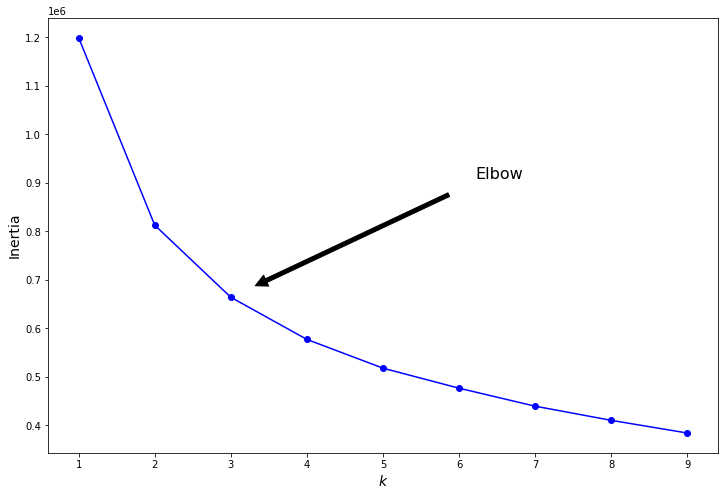

In [255]:
plt.figure(figsize=(12, 8))
plt.plot(range(1, 10), inertias, "bo-")
plt.xlabel("$k$", fontsize=14)
plt.ylabel("Inertia", fontsize=14)
plt.annotate('Elbow',
             xy=(3, inertias[2]),
             xytext=(0.55, 0.55),
             textcoords='figure fraction',
             fontsize=16,
             arrowprops=dict(facecolor='black', shrink=0.1)
            )
plt.show()

In [256]:
from sklearn.cluster import KMeans

k = 3

kM = KMeans(n_clusters=k,
           random_state=654)
y_pred = kM.fit_predict(X_sc)


In [257]:
clusters = pd.DataFrame(X, columns=X.columns)
clusters['label'] = kM.labels_

In [258]:
clusters.sample(5)

,company_hash,orgyear,ctc,job_position,ctc_updated_year,years_of_experience_in_organization,designation_in_organization,classs,tier,label
69989,Others,2020.0,360000,support engineer,2020.0,3.0,3,3,3,2
160236,otvqo ygraxzso wgqugqvnxgz,2017.0,8000000,data scientist,2019.0,6.0,1,1,1,1
101242,mvqwrvjo,2001.0,3350000,Others,2019.0,22.0,1,1,1,0
136293,nvnv wgzohrnvzwj otqcxwto,2015.0,1220000,fullstack engineer,2021.0,8.0,1,1,1,1
27089,wbt sqghu,2011.0,1600000,Others,2019.0,12.0,2,3,3,2


In [259]:
clusters.shape

(171316, 10)

<IPython.core.display.Javascript object>

<AxesSubplot:xlabel='orgyear', ylabel='ctc'>

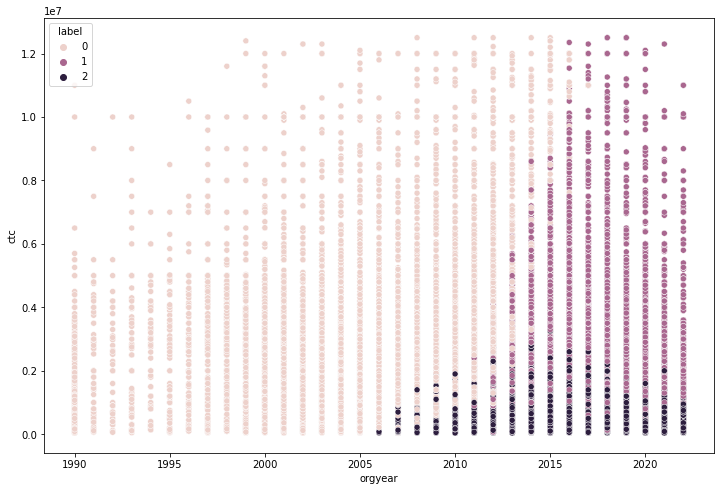

In [260]:
sns.scatterplot(clusters["orgyear"],
               clusters["ctc"],
               hue = clusters["label"])

<AxesSubplot:xlabel='label'>

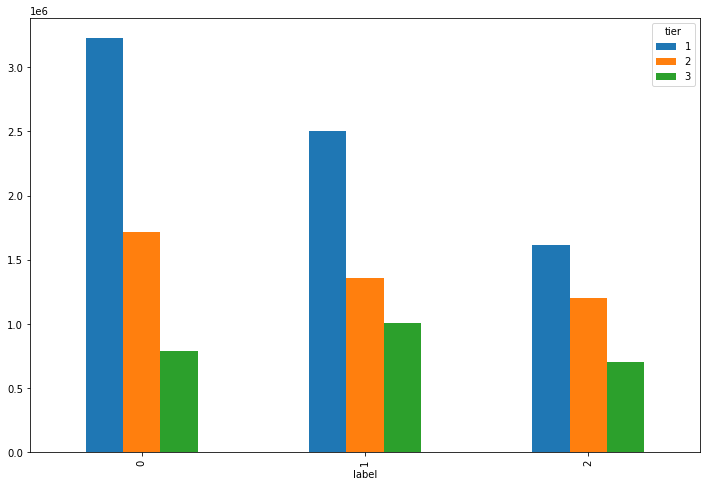

In [261]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<AxesSubplot:xlabel='label'>

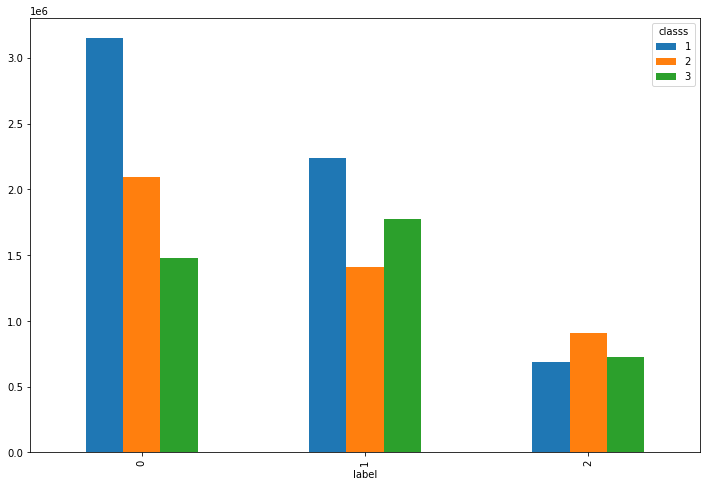

In [262]:
pd.crosstab(index = clusters["label"],
    columns = clusters["classs"],values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<AxesSubplot:xlabel='label'>

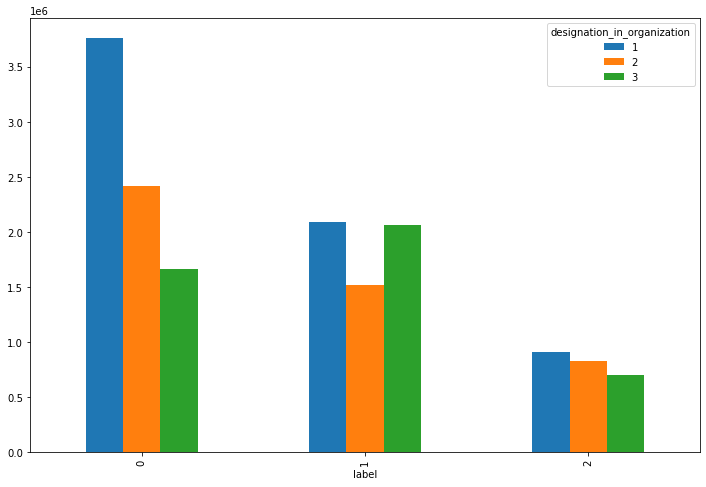

In [263]:
pd.crosstab(index = clusters["label"],
    columns = clusters["designation_in_organization"],
            values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<AxesSubplot:xlabel='years_of_experience_in_organization'>

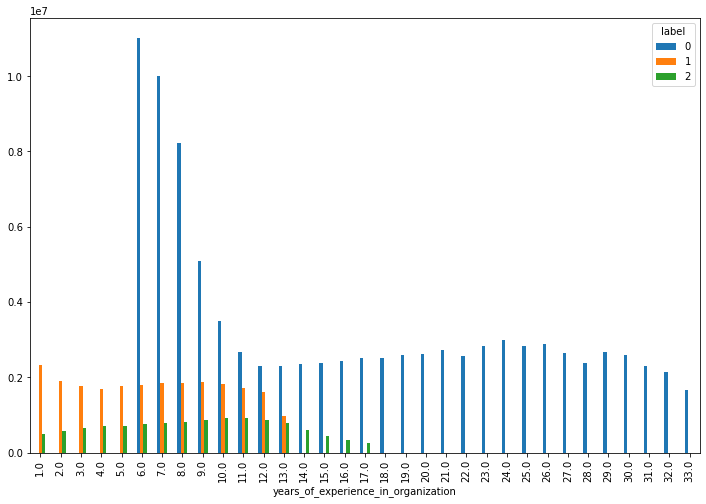

In [264]:
pd.crosstab(columns = clusters["label"],
    index = clusters["years_of_experience_in_organization"],
            values=clusters["ctc"],aggfunc= np.mean
       ).plot(kind = "bar")

<AxesSubplot:xlabel='years_of_experience_in_organization'>

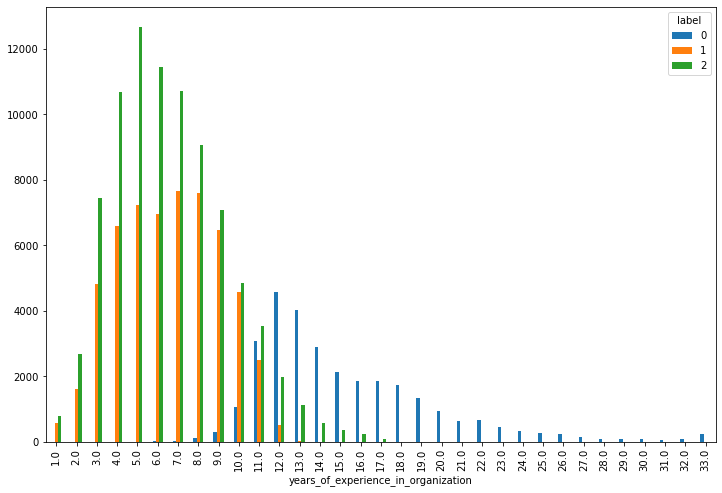

In [266]:
pd.crosstab(columns = clusters["label"],
    index = clusters["years_of_experience_in_organization"],
            
       ).plot(kind = "bar")

<AxesSubplot:xlabel='label'>

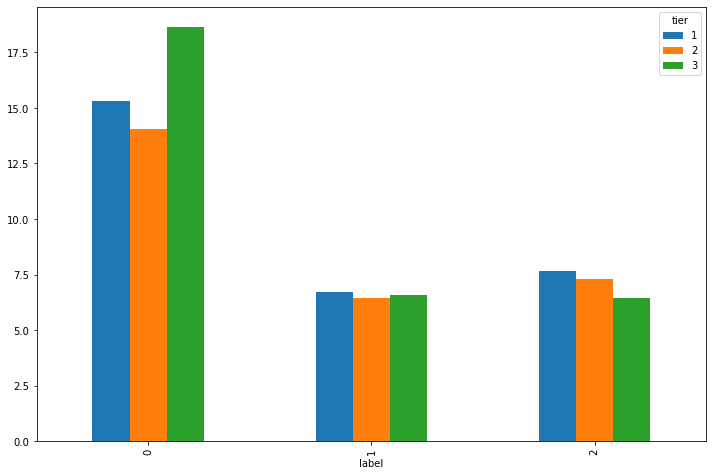

In [269]:
pd.crosstab(index = clusters["label"],
    columns = clusters["tier"],
            values=clusters["years_of_experience_in_organization"],
            aggfunc=np.mean
       ).plot(kind = "bar")